# Proyecto Final


> *Maria Conchita Vasquez*  
> *Carnet 20062228 seccion V*
* * *
## 1. Crear un entorno de anaconda con los paquetes que considere necesarios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm

## Objeto que usare durante cada paso del proyecto

In [60]:
class ModeloPropio:
    def __init__(self, datos):
        self.datos = datos
    #funcion que devuelve los datos estadisticos de la porcion de data enviada
    def datos_estadisticos(self):
        media = np.nanmean(self.datos, axis=0) # obtengo la media de cada columna
        maximo = np.nanmax(self.datos, axis=0) # obtengo el valor minimo de cada columna
        minimo = np.nanmin(self.datos, axis=0)  # obtengo el valor maximo de cada columna
        desvest = np.nanstd(self.datos, axis=0) # obtengo la desviacion Estandar de cada columna
        rango= maximo - minimo # obtengo el rango restando los valores maximo - minimo
        val = 0
        #Creo un diccionario
        diccEstadistico = {}
        for i in self.datos.columns:
            diccEstadistico[i] = {"Media="+str(media[val]),"DesE="+str(desvest[val]),"vMax="+str(maximo[val]),"vMin="+str(minimo[val]),"Rango="+str(rango[val])}
            val = val + 1
        return diccEstadistico
    #creo un procedimiento que despliega las graficas solicitadas en el punto 4
    def graficarVariables(self):
        fig, ax=plt.subplots(figsize=(30,20),nrows=2,ncols=3)
        sns.distplot(self.datos['SalePrice'], fit=norm, kde=False, ax=ax[0,0])
        sns.distplot(self.datos['OverallQual'], fit=norm, kde=False, ax=ax[0,1])
        sns.distplot(self.datos['1stFlrSF'], fit=norm, kde=False, ax=ax[0,2])
        sns.distplot(self.datos['TotRmsAbvGrd'], fit=norm, kde=False, ax=ax[1,0])
        sns.distplot(self.datos['YearBuilt'], fit=norm, kde=False, ax=ax[1,1])
        sns.distplot(self.datos['LotFrontage'], fit=norm, kde=False, ax=ax[1,2])
        plt.show()
        
    # calcula el punto 6 Crear una funcion para entrenar un modelo de regresion lineal de una variable
    #regresa un diccionario con todas las iteraciones
    def mi_regresion(self, B0 , B1, itera, nombreX, nombreY, learnRate, imprimir):
        #genero un vector lleno de uno's para poder multiplicar el escalar por el vector bo y b1
        iniciar = np.ones((len(self.datos),1))
        #transpongo los datos para poder operarlos con mi vector iniciar
        #no. 7 Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x
        #y la segunda columna de la matriz para todas las filas es igual a 1. (iniciar)
        iniciar = np.column_stack((self.datos[nombreX].values.reshape(-1,1),iniciar))
        y_normal = self.datos[nombreY].values.reshape(-1,1)
        X_normal = self.datos[nombreX].values.reshape(-1,1)
        diccRegresion = {}
        #iterar el epoch
        for x in range (itera+1):
            y_prima = np.dot(iniciar,[B1,B0]).reshape(-1,1)
            Error = (((y_normal - y_prima)**2).sum())/(2*len(self.datos))
            B1 = B1 - (learnRate*(((y_prima - y_normal)*X_normal).sum()/(len(self.datos))))
            B0 = B0 - (learnRate*((y_prima - y_normal).sum()/(len(self.datos))))
            diccRegresion[x]=[Error,B0,B1] #guardo un diccionario de un vector
            if((x%imprimir) == 0):
                print(str(x)+" - Error  = "+str(Error)+" , B0 = "+str(B0)+ ", B1 =" +str(B1))
        return diccRegresion
    
    def Graficar_modelo_tiempo(self, Modelo, ValorN, NombreX, NombreY):
        ValoresModelo = list(Modelo.values())
        #de la misma manera que extraigo los errores traigo los betas con la funcion corta
        B0 = [row[1] for row in ValoresModelo]
        B1 = [row[2] for row in ValoresModelo]
        plt.figure(figsize=(12,12))
        plt.scatter(self.datos[NombreX],self.datos[NombreY])
        plt.xlabel(NombreX)
        plt.ylabel(NombreY)
        Colores = ['Red','yellow','green','purple','black']
        adelante = 0
        for x in range (len(B0)):
            if((x%ValorN) == 0):
                #dibujo la recta en la iteracion
                plt.plot(self.datos[NombreX],B0[x]+(B1[x]*self.datos[NombreX]), color=Colores[adelante],linewidth=1)
                adelante = adelante + 1
                if (adelante >= len(Colores)):
                    adelante = 0
        plt.show()
    
    @staticmethod
    def graficaSimple(ValorX, ValorY, NombreX, NombreY):
        plt.figure(figsize=(10,10))
        plt.scatter(ValorX,ValorY)
        plt.xlabel(NombreX)
        plt.ylabel(NombreY)
        plt.show()
    #genero una funion que compara mi modelo con sklearn promediandolo
    @staticmethod
    def Estimacion_fit_modelos(Modelo1, nombre_modelo1, Modelo2, nombre_modelo2, Data_testX):
        Columnas = [nombre_modelo1,nombre_modelo2,"Promedio"] 
        #calculo el valor de Y Y=bo+b1*x
        ResultadosModelo1 =Modelo1[0]+(Modelo1[1]* Data_testX)
        ResultadosModelo2 =Modelo2[0]+(Modelo2[1]* Data_testX)
        #Promedio
        B0Promedio = (Modelo1[0] + Modelo2[0])/2
        B1Promedio = (Modelo1[1] + Modelo2[1])/2
        ResultadosModeloPromedio =B0Promedio+(B1Promedio* Data_testX)
        data = np.column_stack((ResultadosModelo1,ResultadosModelo2,ResultadosModeloPromedio))
        df = pd.DataFrame(data=data, columns = Columnas)
        return df
    
    #genero es un procedimiento que grafica la diferencia entre la "y" calculada por mi modelo, sklearn, promedio vrs "y" real.
    @staticmethod
    def Estimacion_MSE_modelos(Modelos, Data_Y):
        x = Modelos.columns
        y = []
        Colores = ['Red','yellow','green','purple','black']
        adelante = 0
        plt.figure(figsize=(10,10))
        for i in Modelos:
            Error = ((((Modelos[i].values.reshape(-1,1))-Data_Y)**2)/len(Data_Y)).sum()
            plt.bar(1,76,width=0.45, edgecolor='k', color=Colores[adelante], label=Error)
            plt.bar(i,Error,color=Colores[adelante])   
            adelante = adelante + 1
            if (adelante >= len(Colores)):
                adelante = 0
        plt.legend(loc=0)
        plt.show()
        

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).


In [4]:
data = np.load("proyecto_training_data.npy")

particion = (len(data)*80)//100 # calculo la particion 
# datos de prueba
prueba =pd.DataFrame(data[0:particion],columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#datos de control
control =pd.DataFrame(data[particion:len(data)],columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
# creo mi objeto con los datos de prueba
modeloAnalizar = ModeloPropio(prueba)

## 3. Analisis exploratorio de datos: Para cada variable en el dataset:
    * media
    * valor maximo
    * valor minimo
    * rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
    * desviacion estandar.
Lo hice sobre los datos de prueba

In [5]:
modeloAnalizar.datos_estadisticos()

{'SalePrice': {'DesE=78781.95108033362',
  'Media=180590.27739726027',
  'Rango=720100.0',
  'vMax=755000.0',
  'vMin=34900.0'},
 'OverallQual': {'DesE=1.377435193240741',
  'Media=6.101027397260274',
  'Rango=9.0',
  'vMax=10.0',
  'vMin=1.0'},
 '1stFlrSF': {'DesE=373.620331503586',
  'Media=1156.3236301369864',
  'Rango=2894.0',
  'vMax=3228.0',
  'vMin=334.0'},
 'TotRmsAbvGrd': {'DesE=1.6084517167387253',
  'Media=6.4854452054794525',
  'Rango=12.0',
  'vMax=14.0',
  'vMin=2.0'},
 'YearBuilt': {'DesE=29.93888206867768',
  'Media=1971.451198630137',
  'Rango=135.0',
  'vMax=2010.0',
  'vMin=1875.0'},
 'LotFrontage': {'DesE=23.4659548199304',
  'Media=69.94698544698545',
  'Rango=292.0',
  'vMax=313.0',
  'vMin=21.0'}}

## 4. Para cada variable en el dataset usar seaborn(funcion distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable

C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\50255\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

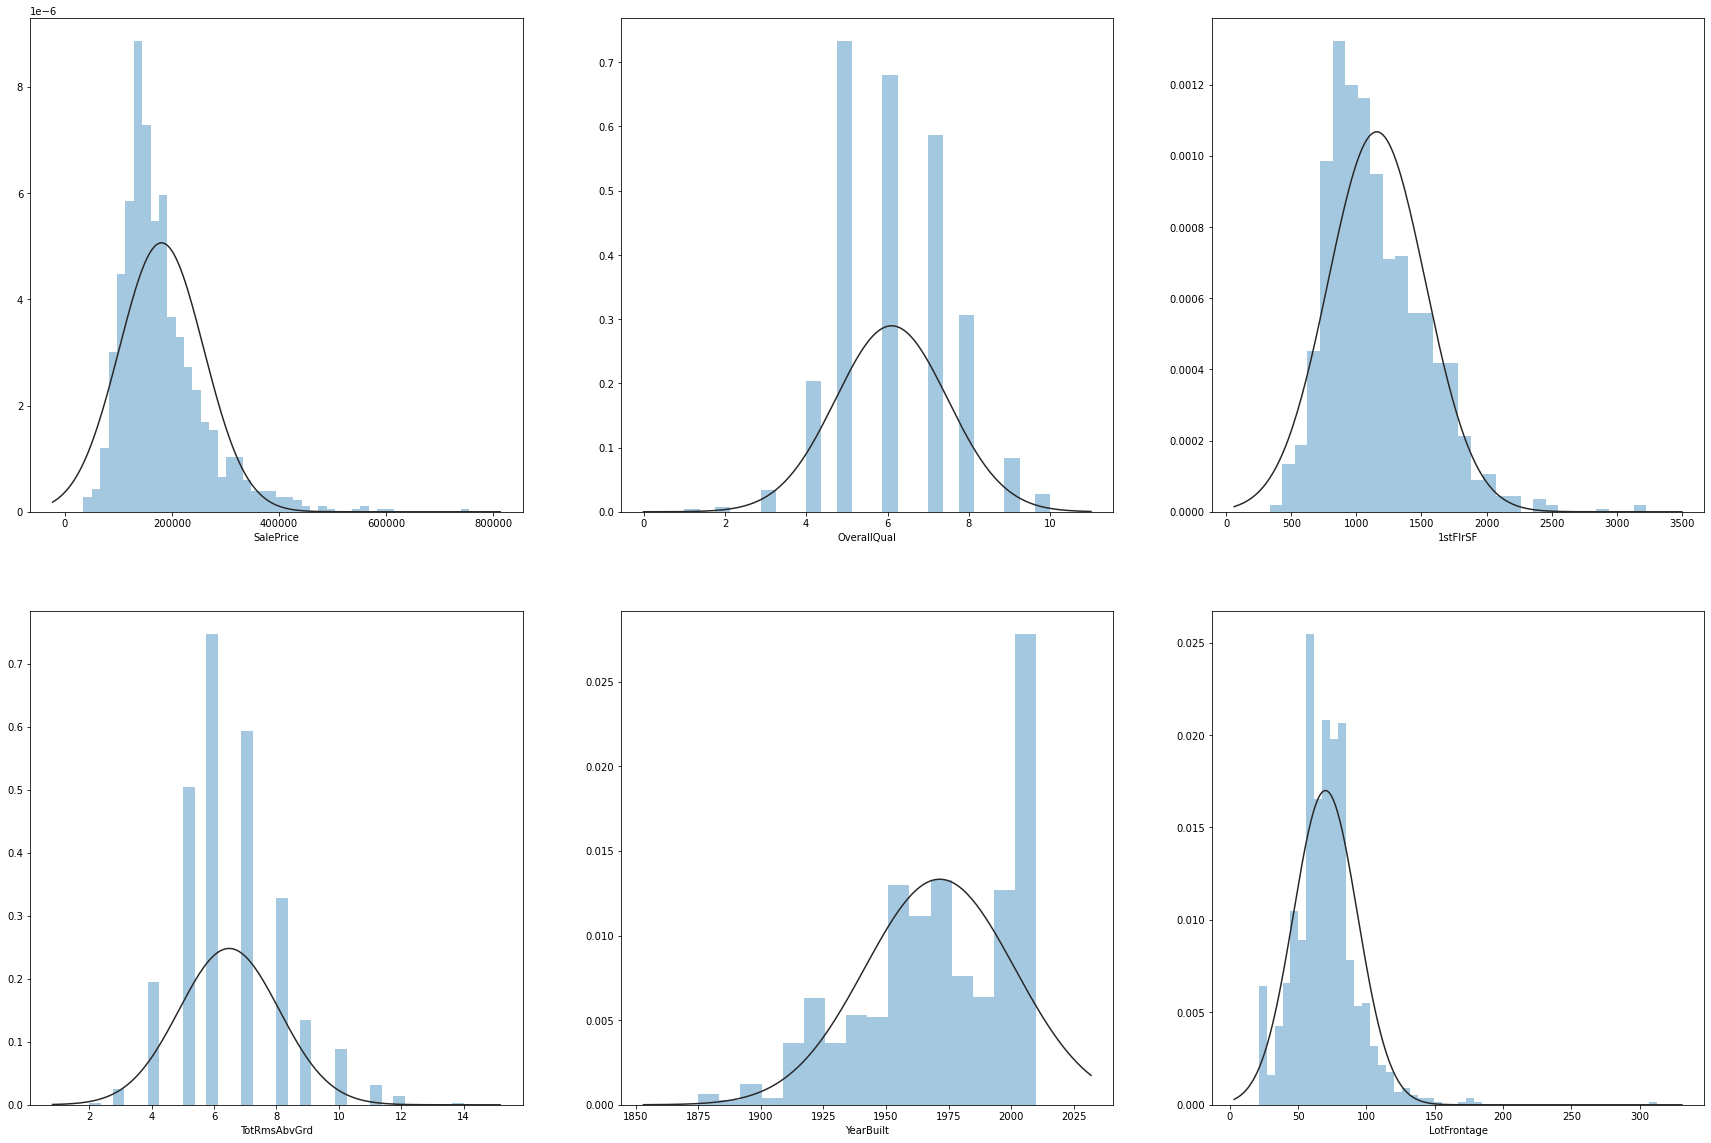

In [6]:
modeloAnalizar.graficarVariables()

## 5. Para cada variable independiente x : 
* Calcular el coeficiente de correlacion entre x y y. 
* Graficar x vs y(scatterplot) usando matplotlib.
* Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica.
* Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente.


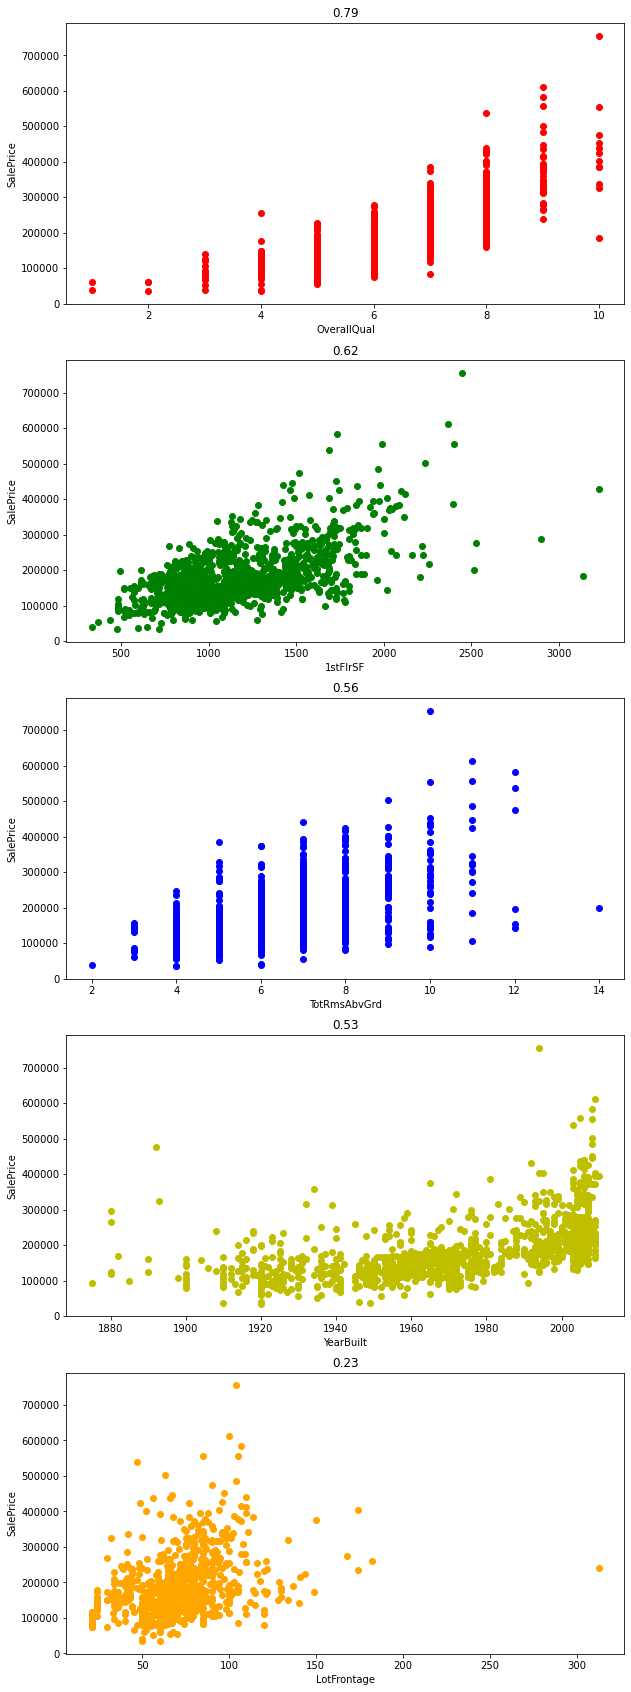

In [7]:
# OverallQual vrs SalePrice
plt.figure(figsize=(10,30))
plt.subplot(5,1,1)
plt.scatter(prueba['OverallQual'],prueba['SalePrice'], color='r')
plt.title((np.round(np.corrcoef(prueba['SalePrice'],prueba['OverallQual']),2)[1][0]))
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
# 1stFlrSF vrs SalePrice
plt.subplot(5,1,2)
plt.title((np.round(np.corrcoef(prueba['1stFlrSF'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['1stFlrSF'],prueba['SalePrice'], color='g')
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
# TotRmsAbvGrd vrs SalePrice
plt.subplot(5,1,3)
plt.title((np.round(np.corrcoef(prueba['TotRmsAbvGrd'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['TotRmsAbvGrd'],prueba['SalePrice'], color='b')
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
# YearBuilt vrs SalePrice
plt.subplot(5,1,4)
plt.title((np.round(np.corrcoef(prueba['YearBuilt'],prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['YearBuilt'],prueba['SalePrice'], color='y')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
# LotFrontage vrs SalePrice
plt.subplot(5,1,5)
plt.title((np.round(np.corrcoef(np.nan_to_num(prueba['LotFrontage']),prueba['SalePrice']),2)[1][0]))
plt.scatter(prueba['LotFrontage'],prueba['SalePrice'], color='orange')
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.
    La funcion recibe como argumentos:
    6.1 Vector con la variable independiente x,
    6.2 Vector con la variable dependiente y,
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos imprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:10,20,30,40,50.
    6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar en cada iteracion los parametros del modelo.


In [8]:
# mando el valor B0 y B1 inicial, el epochs, cuales sera mi valores X y Valores en Y , learningrate  y cada cuanto imprimo
Modelo1 = modeloAnalizar.mi_regresion(1,4000,30000, "OverallQual", "SalePrice", 0.001, 5000)
# ultima iteracion
print("Ultima Iteracion del modelo:")
print("Error                    B0                    B1")
print(Modelo1[list(Modelo1.keys())[-1]])

0 - Error  = 14970734076.458048 , B0 = 157.18516780821918, B1 =5031.462120719178
5000 - Error  = 1299431830.4650295 , B0 = -17169.63905118396, B1 =33029.610513753745
10000 - Error  = 1241907222.0095882 , B0 = -33886.49569887269, B1 =35639.88524753802
15000 - Error  = 1206079281.5615118 , B0 = -47079.348123751864, B1 =37699.89988288323
20000 - Error  = 1183764634.8178442 , B0 = -57491.07556586672, B1 =39325.65223872208
25000 - Error  = 1169866446.6142466 , B0 = -65707.95428456273, B1 =40608.68716340978
30000 - Error  = 1161210264.9788623 , B0 = -72192.67031781746, B1 =41621.25135380204
Ultima Iteracion del modelo:
Error                    B0                    B1
[1161210264.9788623, -72192.67031781746, 41621.25135380204]


In [9]:
# mando el valor B0 y B1 inicial, el epochs, cuales sera mi valores X y Valores en Y , learningrate  y cada cuanto imprimo
Modelo2 = modeloAnalizar.mi_regresion(30000,100,30000, "1stFlrSF", "SalePrice", 0.000001, 5000)
# ultima iteracion
print("Ultima Iteracion del modelo:")
print("Error                    B0                    B1")
print(Modelo2[list(Modelo2.keys())[-1]])

0 - Error  = 2598269199.54024 , B0 = 30000.034957914384, B1 =144.6036208313356
5000 - Error  = 1924633836.2278926 , B0 = 30000.177053030886, B1 =130.20527274259067
10000 - Error  = 1924633831.527877 , B0 = 30000.330350324508, B1 =130.20515270188056
15000 - Error  = 1924633826.8323026 , B0 = 30000.483575178358, B1 =130.20503271789505
20000 - Error  = 1924633822.1411643 , B0 = 30000.636727626625, B1 =130.2049127906073
25000 - Error  = 1924633817.4544585 , B0 = 30000.789807703517, B1 =130.20479291999055
30000 - Error  = 1924633812.7721808 , B0 = 30000.942815443264, B1 =130.20467310601802
Ultima Iteracion del modelo:
Error                    B0                    B1
[1924633812.7721808, 30000.942815443264, 130.20467310601802]


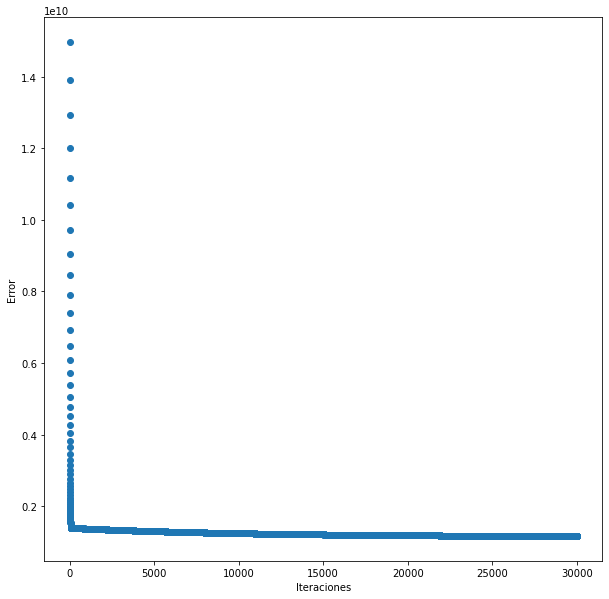

In [10]:
ValoresY = list(Modelo1.values())
ValoresX = list(Modelo1.keys())
errores = [row[0] for row in ValoresY] #creo una funcion reducida ufuncion para extraer los errores de el diccionario
ModeloPropio.graficaSimple(ValoresX, errores, "Iteraciones" , "Error")

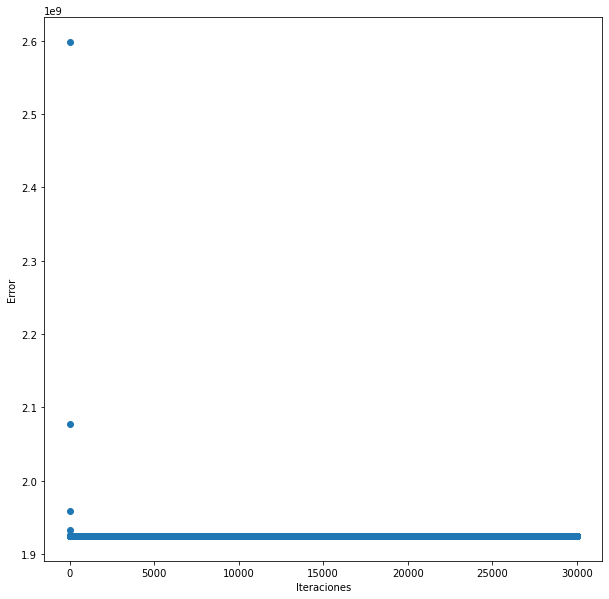

In [11]:
ValoresY = list(Modelo2.values())
ValoresX = list(Modelo2.keys())
errores = [row[0] for row in ValoresY]
ModeloPropio.graficaSimple(ValoresX, errores, "Iteraciones" , "Error")

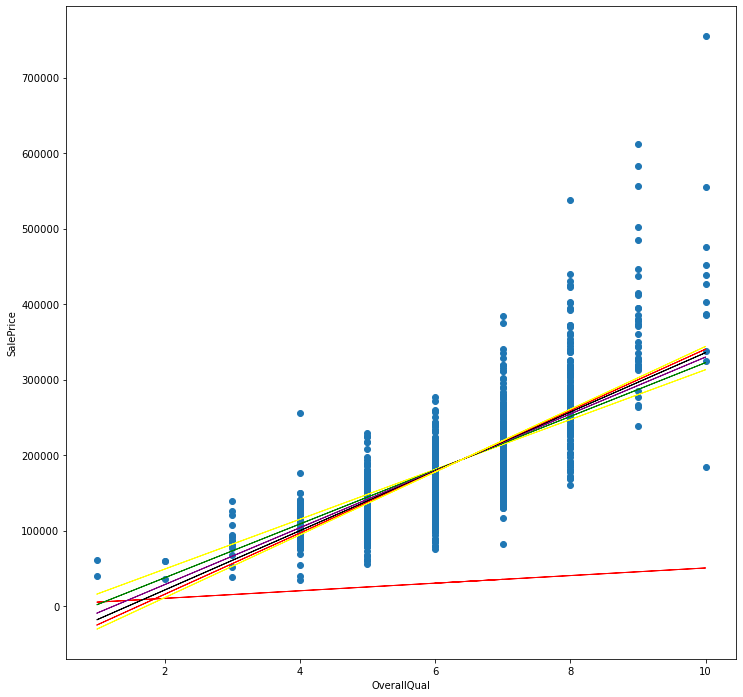

In [12]:
modeloAnalizar.Graficar_modelo_tiempo(Modelo1,5000, "OverallQual" , "SalePrice")

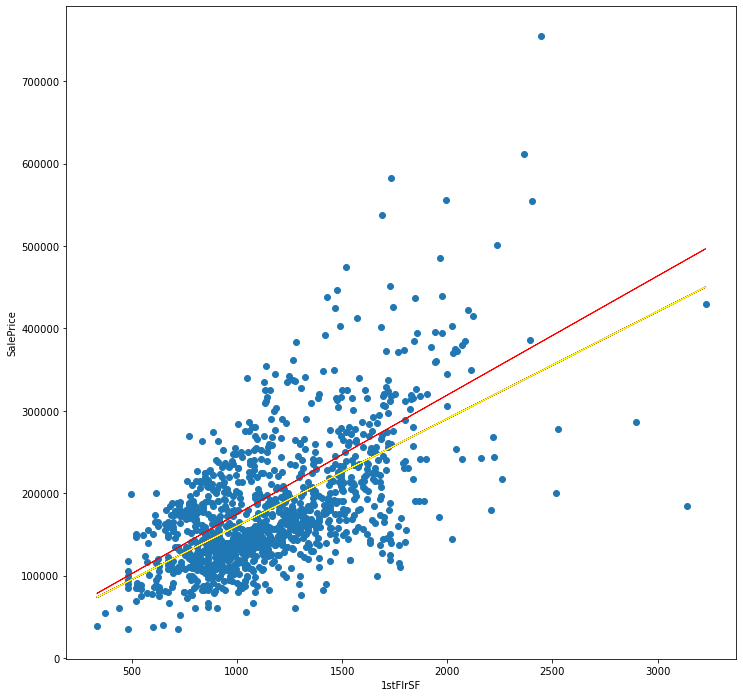

In [13]:
modeloAnalizar.Graficar_modelo_tiempo(Modelo2,5000, "1stFlrSF" , "SalePrice")

In [14]:
#utilizo sklearn para comparar los resultados
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm1=LinearRegression()
lm1.fit(prueba['OverallQual'].values.reshape(-1,1),prueba['SalePrice'].values.reshape(-1,1))
y_preds1 = lm1.predict(control['OverallQual'].values.reshape(-1,1))
print("B0 = "+ str((lm1.intercept_)[0]))
print("B1 = "+ str((lm1.coef_)[0][0]))
print("MSE = "+ str(metrics.mean_squared_error(control['SalePrice'].values.reshape(-1,1), y_preds1)))


B0 = -96469.57131873982
B1 = 45411.998779159156
MSE = 2630182608.9486394


In [15]:
#utilizo sklearn para comparar los resultados
lm2=LinearRegression()
lm2.fit(prueba['1stFlrSF'].values.reshape(-1,1),prueba['SalePrice'].values.reshape(-1,1))
y_preds2 = lm2.predict(control['1stFlrSF'].values.reshape(-1,1))
print("B0 = "+ str((lm2.intercept_)[0]))
print("B1 = "+ str((lm2.coef_)[0][0]))
print("MSE = "+ str(metrics.mean_squared_error(control['SalePrice'].values.reshape(-1,1), y_preds2)))

B0 = 30324.585174963664
B1 = 129.95124228715716
MSE = 4585538274.6918745


In [22]:
#Envio B0 y B1 de cada modelo

UltimaIteracion = Modelo1[list(Modelo1.keys())[-1]]
# Obtengo coeficiente Manual 
ModeloManual = [UltimaIteracion[1],UltimaIteracion[2]]
# Obtengo coeficientes de sklearn
Modelosklearn = [(lm1.intercept_)[0],(lm1.coef_)[0][0]]
CalculosModelos1 = ModeloPropio.Estimacion_fit_modelos(ModeloManual,"Modelo_manual",Modelosklearn,"Modelo_sklearn",control['OverallQual'].values.reshape(-1,1))
CalculosModelos1

,Modelo_manual,Modelo_sklearn,Promedio
0,177534.837805,176002.421356,176768.629581
1,344019.843220,357650.416473,350835.129847
2,177534.837805,176002.421356,176768.629581
3,177534.837805,176002.421356,176768.629581
4,219156.089159,221414.420135,220285.254647
...,...,...,...
287,177534.837805,176002.421356,176768.629581
288,177534.837805,176002.421356,176768.629581
289,219156.089159,221414.420135,220285.254647
290,135913.586451,130590.422577,133252.004514


In [25]:
#Envio B0 y B1 de cada modelo

UltimaIteracion = Modelo2[list(Modelo2.keys())[-1]]
# Obtengo coeficiente Manual 
ModeloManual = [UltimaIteracion[1],UltimaIteracion[2]]
# Obtengo coeficientes de sklearn
Modelosklearn = [(lm2.intercept_)[0],(lm2.coef_)[0][0]]
CalculosModelos2 = ModeloPropio.Estimacion_fit_modelos(ModeloManual,"Modelo_manual",Modelosklearn,"Modelo_sklearn",control['1stFlrSF'].values.reshape(-1,1))
CalculosModelos2

,Modelo_manual,Modelo_sklearn,Promedio
0,190933.918774,190944.320642,190939.119708
1,268405.699273,268265.309803,268335.504538
2,175569.767348,175610.074052,175589.920700
3,194189.035602,194193.101699,194191.068651
4,111378.863507,111544.111604,111461.487556
...,...,...,...
287,154085.996285,154168.119075,154127.057680
288,299915.230164,299713.510436,299814.370300
289,184684.094465,184706.661012,184695.377739
290,170361.580424,170412.024361,170386.802392


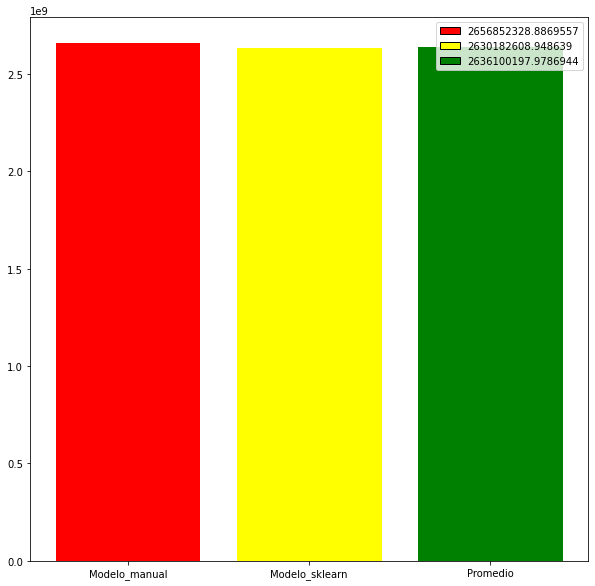

In [58]:
ModeloPropio.Estimacion_MSE_modelos(CalculosModelos1, control['SalePrice'].values.reshape(-1,1))

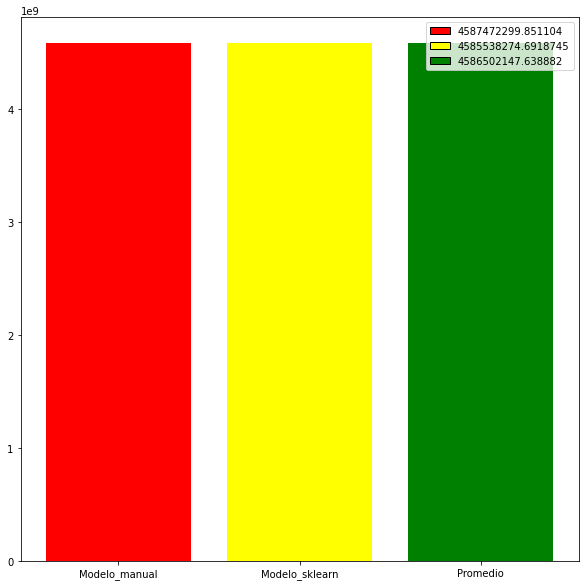

In [59]:
ModeloPropio.Estimacion_MSE_modelos(CalculosModelos2, control['SalePrice'].values.reshape(-1,1))